# A Counter Example to Koushnirenko's Conjecture

Ths notebook illustrates the
counter example of Bertrand Haas, against the Koushnirenko conjecture,
executed on one core and on many cores.

Bertrand Haas: A simple counterexample to Kouchnirenko's conjecture.
Beitraege zur Algebra und Geometrie/Contributions to Algebra and Geometry, 
volume 43, number 1, pages 1 to 8, 2002.

To get the proper wall clock time, we have to be mindful that the Python code calls the compiled functions in the PHCpack library.  Therefore, the Python timers will not give accurate timings.  Instead, we have to rely on the actual date and time, from the package `datetime` in Python.

In [1]:
from datetime import datetime

For the plot, the implicit plotting of `sympy` will be used.

In [2]:
from sympy import plot_implicit, symbols, Eq

In [3]:
from phcpy.dimension import get_core_count
from phcpy.solver import solve
from phcpy.solutions import filter_real

PHCv2.4.88 released 2023-12-26 works!


## 1. Solving the System on Many Cores

In [4]:
H = [ 'x**108 + 1.1*y**54 - 1.1*y;', 
      'y**108 + 1.1*x**54 - 1.1*x;' ]

According to the theorem of Bézout, we may expect a number of complex solutions equals to the product of the degrees of the polynomials.

In [5]:
108*108

11664

As the solver computes all complex solutions, executing the following code block takes some time ...

In [6]:
print('Solving on one core ...')
wstart = datetime.now()
sols = solve(H, verbose_level=False)
wstop = datetime.now()
print('  Number of solutions :', len(sols))
print('start time :', wstart)
print(' stop time :', wstop)
print('   elapsed :', wstop - wstart)

Solving on one core ...
  Number of solutions : 11662
start time : 2024-01-26 17:28:47.638521
 stop time : 2024-01-26 17:29:22.810493
   elapsed : 0:00:35.171972


We can significantly speed up this computation if the computer has many cores.

In [7]:
nbcores = get_core_count()
print('Solving on', nbcores, 'cores ...')
wstart = datetime.now()
sols = solve(H, tasks=nbcores, verbose_level=False)
wstop = datetime.now()
print('  Number of solutions :', len(sols))
print('start time :', wstart)
print(' stop time :', wstop)
print('   elapsed :', wstop - wstart)

Solving on 88 cores ...
  Number of solutions : 11664
start time : 2024-01-26 17:29:22.823028
 stop time : 2024-01-26 17:29:30.402404
   elapsed : 0:00:07.579376


## 2. Extracting the Real Roots

Rather than eyeballing all 11,664 complex solutions ourselves, we ask to filter the real solutions.

In [8]:
realsols = filter_real(sols, tol=1.0e-8, oper='select')

In [9]:
for (idx, sol) in enumerate(realsols):
    print('Solution', idx+1, ':')
    print(sol)

Solution 1 :
t :  0.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  0.00000000000000E+00   0.00000000000000E+00
 y :  0.00000000000000E+00   0.00000000000000E+00
== err :  0.000E+00 = rco :  1.000E+00 = res :  0.000E+00 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.99997917489999E-01   7.17464813734306E-43
 y :  9.19904793199125E-01  -1.23977919813288E-39
== err :  1.310E-16 = rco :  1.601E-03 = res :  8.674E-15 =
Solution 3 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.36266084294562E-01   1.25897908904183E-46
 y :  9.99986016402972E-01  -4.81097647816595E-50
== err :  5.524E-17 = rco :  2.070E-03 = res :  3.600E-15 =
Solution 4 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.19904793199125E-01  -1.54806532008540E-47
 y :  9.99997917489999E-01   9.52172427970345E-51
== err :  2.853E-16 = rco :  1.601E-03 = res :  8.674E-15 =
Solu

We observe $(0, 0)$ and five additional positive roots.

## 3. Plotting the Curves

Without knowing the precise location of the intersection points, the curves are hard to plot.

In [10]:
x, y = symbols('x y')

In converting the strings in the polynomial system `H` we have to remove the trailing semicolon.

In [11]:
p0 = eval(H[0][:-1])
p0

x**108 + 1.1*y**54 - 1.1*y

In [12]:
p1 = eval(H[1][:-1])
p1

1.1*x**54 - 1.1*x + y**108

In [13]:
plot0 = plot_implicit(Eq(p0, 0), (x, 0.93, 1.01), (y, 0.93, 1.01), \
                      line_color='black', depth=1, \
    markers=[{'args': [[0.99148, 0.93626, 0.99998], \
                       [0.99148, 0.99998, 0.93626], 'bo']}], \
                      axis_center=(0.93, 0.93), show=False)

In [14]:
plot1 = plot_implicit(Eq(p1, 0), (x, 0.93, 1.01), (y, 0.93, 1.01), \
                      line_color='red', depth=1, \
                      axis_center=(0.93, 0.93), show=False)

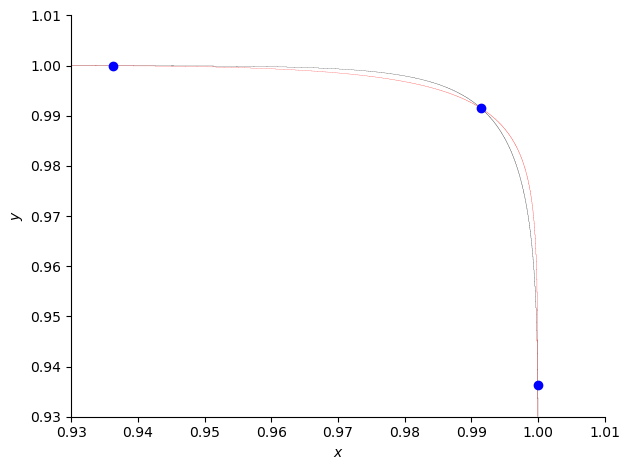

In [15]:
plot0.append(plot1[0])
plot0.show()

In [16]:
plot3 = plot_implicit(Eq(p0, 0), (x, 0.9, 1.0025), (y, 0.99, 1.0025), \
                      line_color='black', depth=1, \
    markers=[{'args': [[0.99148, 0.93626, 0.91990], \
                       [0.99148, 0.99998, 0.99999], 'bo']}], \
                      axis_center=(0.9, 0.99), show=False)

In [17]:
plot4 = plot_implicit(Eq(p1, 0), (x, 0.9, 1.0025), (y, 0.99, 1.0025), \
                      line_color='red', depth=1, \
                      axis_center=(0.9, 0.99), show=False)

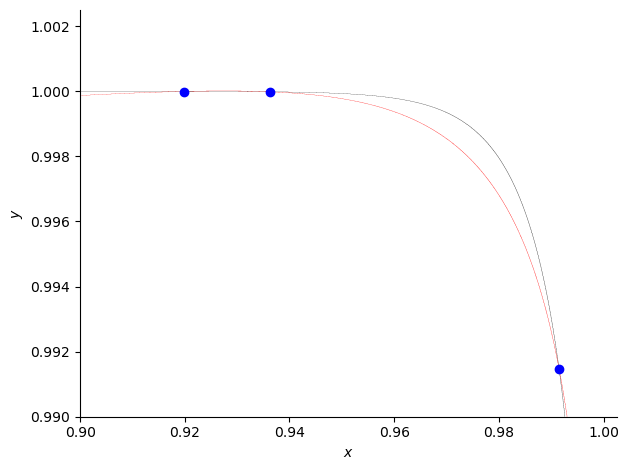

In [18]:
plot3.append(plot4[0])
plot3.show()

In [19]:
plot5 = plot_implicit(Eq(p0, 0), (x, 0.9, 1.0005), (y, 0.999, 1.0005), \
                      line_color='black', depth=1, \
    markers=[{'args': [[0.93626, 0.91990], \
                       [0.99998, 0.99999], 'bo']}], \
                      axis_center=(0.9, 0.999), show=False)

In [20]:
plot6 = plot_implicit(Eq(p1, 0), (x, 0.9, 1.0005), (y, 0.999, 1.0005), \
                      line_color='red', depth=1, \
                      axis_center=(0.9, 0.999), show=False)

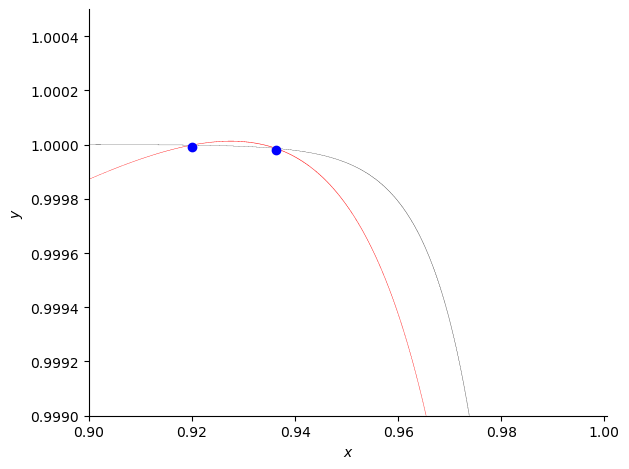

In [21]:
plot5.append(plot6[0])
plot5.show()